In [33]:
#dependecies 
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [4]:
data_df = pd.read_csv("Resources/DataScience_salaries_2024.csv")
data_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L


In [121]:
year_sort_df = data_df.sort_values('work_year')
year_sort_df.reset_index(drop = True)
cleaned_data_df = year_sort_df[['work_year', 'experience_level',	'employment_type',	'job_title',	'salary_in_usd',	'employee_residence',	'remote_ratio',	'company_location',	'company_size']]
cleaned_data_df
bonus_df = cleaned_data_df.rename(columns={"work_year":"Work Year", "experience_level":"Experience Level",
                                    "employment_type":"Employment Type", "job_title":"Job Title",
                                    "salary_in_usd":"Salary (USD)", "employee_residence":"Employee Residence (Country)",
                                    "remote_ratio":"Remote Work Ratio", "company_location":"Location of Company (Country)",
                                   "company_size":"Size of Company"})
bonus_df
location_filter = bonus_df['Location of Company (Country)'].value_counts()
clean_df = bonus_df[bonus_df['Location of Company (Country)'].isin(location_filter[location_filter > 15].index)]
clean_df

,Work Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
14834,2020,EX,FT,Staff Data Analyst,15000,NG,0,CA,M
3523,2020,SE,FT,Data Science Manager,190200,US,100,US,M
3647,2020,SE,FT,Lead Data Scientist,190000,US,100,US,S
13488,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
13921,2020,SE,FL,Computer Vision Engineer,60000,RU,100,US,S
...,...,...,...,...,...,...,...,...,...
1958,2024,MI,FT,Machine Learning Engineer,223100,US,0,US,M
14793,2024,EN,FT,Data Analyst,28750,GB,0,GB,M
14792,2024,EN,FT,Data Analyst,28750,GB,0,GB,M
14832,2024,EN,PT,Data Science,16666,DE,50,DE,M


In [179]:
co = clean_df.loc[clean_df["Location of Company (Country)"] == "CO", :]
#true_values_co = co[co[0] == True]
co 
#true_values_co

,Work Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
14802,2021,EN,FT,Machine Learning Engineer,21844,CO,50,CO,M
9323,2022,SE,FT,AI Scientist,125000,CO,100,CO,L
14325,2023,SE,FT,Data Manager,48000,CO,0,CO,M
13876,2023,SE,FT,Data Engineer,60000,CO,100,CO,M
13871,2023,SE,FT,Data Analyst,60000,CO,100,CO,M
13864,2023,MI,FT,Data Engineer,60000,CO,100,CO,M
13676,2023,SE,FT,Data Manager,65000,CO,0,CO,M
13392,2023,SE,FT,Machine Learning Engineer,70000,CO,0,CO,M
13285,2023,SE,FT,Data Engineer,72000,CO,100,CO,M
13281,2023,MI,FT,Data Engineer,72000,CO,100,CO,M


In [91]:
work_year_counts = pd.DataFrame(bonus_df['Work Year'].value_counts())
work_year_counts.sort_index()


,count
Work Year,
2020,75
2021,218
2022,1652
2023,8519
2024,4374


In [92]:
avg_sal_per_year = bonus_df.groupby('Work Year')['Salary (USD)'].mean()
round(avg_sal_per_year)

Work Year
2020    102251.0
2021     99922.0
2022    134404.0
2023    153733.0
2024    151510.0
Name: Salary (USD), dtype: float64

In [185]:
#Avg salary by company size
comp_size = pd.DataFrame(bonus_df.sort_values('Location of Company (Country)'))
clean_comp = comp_size[comp_size['Location of Company (Country)'].isin(location_filter[location_filter > 15].index)]
comp_loc_and_size = clean_comp[['Location of Company (Country)', 'Size of Company']]
grouped_df = pd.DataFrame(comp_loc_and_size.groupby('Size of Company').value_counts())

grouped_df

count
Size of Company Location of Company (Country)       
L               US                               723
                IN                                38
                DE                                29
                CA                                28
                GB                                27
                NL                                15
                ES                                14
                AU                                11
                FR                                10
                PT                                 7
                BR                                 3
                CO                                 1
M               US                             12185
                GB                               615
                CA                               359
                ES                               111
                DE                                48
                FR                                46
                AU                                41
                PT                                19
                BR                                18
                IN                                16
                LT                                16
                CO                                15
                NL                                12
S               US                                67
                DE                                21
                GB                                13
                CA                                 5
                FR                                 5
                IN                                 5
                ES                                 2
                PT                                 2
                AU                                 1
                NL                                 1

<Figure size 500x500 with 0 Axes>

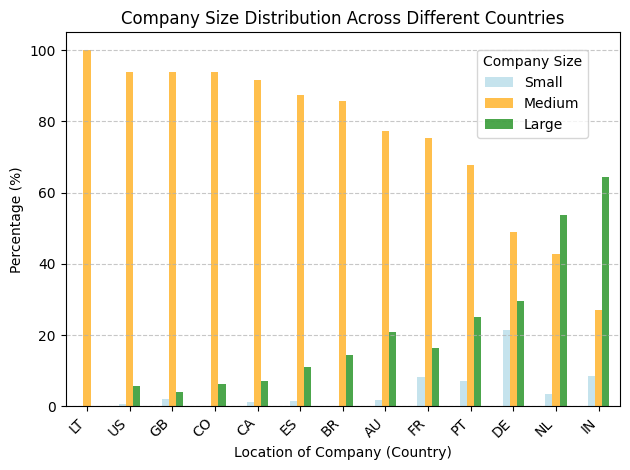

In [239]:
size_counts = clean_df.groupby('Location of Company (Country)')['Size of Company'].value_counts().unstack()
# Calculate the total counts for each location
total_counts = size_counts.sum(axis=1)
# Calculate the percentage of each company size
percentage_S_counts = (size_counts['S'] / total_counts) * 100
percentage_M_counts = (size_counts['M'] / total_counts) * 100
percentage_L_counts = (size_counts['L'] / total_counts) * 100

# Combine percentages into a single DataFrame for plotting
percentage_df = pd.DataFrame({
    'Small': percentage_S_counts,
    'Medium': percentage_M_counts,
    'Large': percentage_L_counts
})
# Sort the data in Descending order
sorted_pct = percentage_df.sort_values('Medium', ascending= False)
# Plot the data
plt.figure(figsize=(5, 5))
# Plot all three series at once with the correct colors
sorted_pct.plot(kind='bar', color=['lightblue', 'orange', 'green'], alpha=0.7)
# Add titles and labels
plt.title('Company Size Distribution Across Different Countries')
plt.xlabel('Location of Company (Country)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Company Size', bbox_to_anchor=(.73, .7))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("Output/remote_country.png")
plt.show()

In [235]:
sorted_pct

,Small,Medium,Large
Location of Company (Country),,,
IN,8.474576,27.118644,64.406780
NL,3.571429,42.857143,53.571429
DE,21.428571,48.979592,29.591837
PT,7.142857,67.857143,25.000000
AU,1.886792,77.358491,20.754717
FR,8.196721,75.409836,16.393443
BR,NaN,85.714286,14.285714
ES,1.574803,87.401575,11.023622
CA,1.275510,91.581633,7.142857


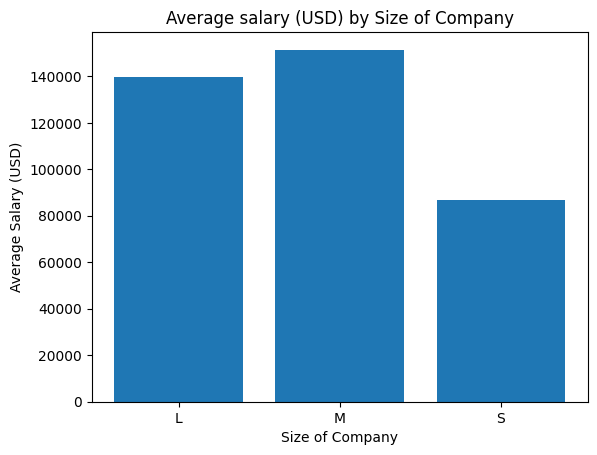

In [122]:
plt.bar(comp_size.index,comp_size['Salary (USD)'])
plt.title('Average salary (USD) by Size of Company')
plt.xlabel('Size of Company')
plt.ylabel('Average Salary (USD)')
plt.savefig("Output/salary_size_by_comp_size.png")
plt.show()

In [123]:
comp_loc = pd.DataFrame(clean_df.groupby('Location of Company (Country)')['Salary (USD)'].mean())
sorted_df = comp_loc.sort_values(by='Salary (USD)',ascending= False)

sorted_df

,Salary (USD)
Location of Company (Country),
US,157410.126474
CA,145174.987245
AU,130126.471698
GB,95321.219847
DE,92163.959184
FR,86310.508197
CO,79115.250000
NL,76171.821429
LT,68553.062500


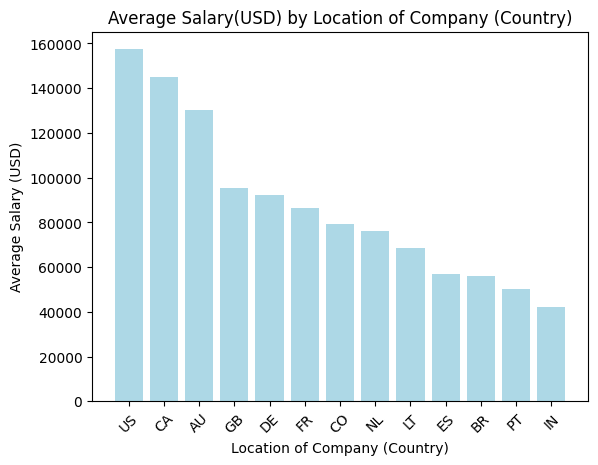

In [238]:
plt.bar(sorted_df.index,sorted_df['Salary (USD)'], color = "lightblue")
plt.title('Average Salary(USD) by Location of Company (Country)')
plt.xlabel('Location of Company (Country)')
plt.ylabel('Average Salary (USD)')
plt.xticks(fontsize = 10,rotation = 45)

plt.savefig("Output/salary_size_by_country.png")
plt.show()